# Linear Regression USe case
- claculating the profit
- based on expenditure 
- factors for profit 1. R&D spend, 2. Administration, 3. marketing spend, 4.state

In [44]:
import pandas as pd

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [46]:
companies = pd.read_csv('1000_Companies.csv')
companies.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [47]:
x = companies.iloc[:,:-1].values
x

array([[165349.2, 136897.8, 471784.1, 'New York'],
       [162597.7, 151377.59, 443898.53, 'California'],
       [153441.51, 101145.55, 407934.54, 'Florida'],
       ...,
       [100275.47, 241926.31, 227142.82, 'California'],
       [128456.23, 321652.14, 281692.32, 'California'],
       [161181.72, 270939.86, 295442.17, 'New York']], dtype=object)

In [48]:
y = companies.iloc[:,4].values
y

array([192261.83   , 191792.06   , 191050.39   , 182901.99   ,
       166187.94   , 156991.12   , 156122.51   , 155752.6    ,
       152211.77   , 149759.96   , 146121.95   , 144259.4    ,
       141585.52   , 134307.35   , 132602.65   , 129917.04   ,
       126992.93   , 125370.37   , 124266.9    , 122776.86   ,
       118474.03   , 111313.02   , 110352.25   , 108733.99   ,
       108552.04   , 107404.34   , 105733.54   , 105008.31   ,
       103282.38   , 101004.64   ,  99937.59   ,  97483.56   ,
        97427.84   ,  96778.92   ,  96712.8    ,  96479.51   ,
        90708.19   ,  89949.14   ,  81229.06   ,  81005.76   ,
        78239.91   ,  77798.83   ,  71498.49   ,  69758.98   ,
        65200.33   ,  64926.08   ,  49490.75   ,  42559.73   ,
        35673.41   ,  14681.4    , 123485.2464 ,  82155.48418,
       125867.0108 , 104976.1696 ,  89803.10053,  75297.23305,
       114284.5283 , 171985.0761 ,  72337.96774, 169566.5772 ,
       158670.9451 , 114522.8756 ,  85842.60573, 101106

In [49]:
companies.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

<Axes: >

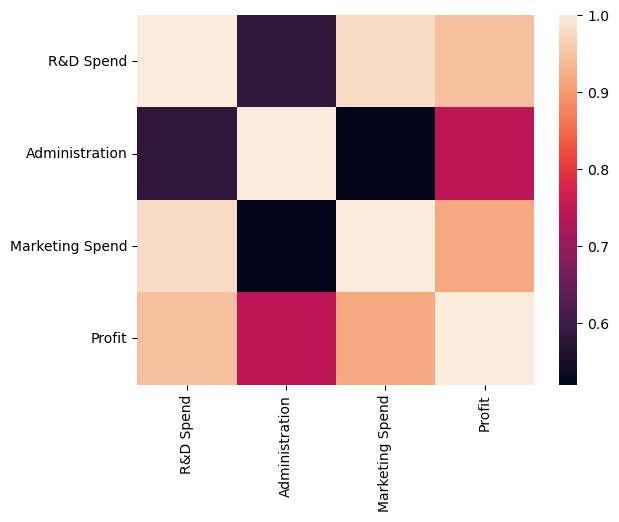

In [50]:

sns.heatmap(companies[['R&D Spend','Administration','Marketing Spend','Profit']].corr())

In [51]:
# Encoding categical data

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

# changing state to numerical value
labelencoder = LabelEncoder()
x[:,3] = labelencoder.fit_transform(x[:,3])
Transformer = ColumnTransformer([('onehot',OneHotEncoder(sparse = False),[3])])
x = Transformer.fit_transform(x)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [52]:
x

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [53]:
# Avoiding dummy values

x = x[:,1:]

In [55]:
# creation of linear regression model

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state = 0)

In [56]:
# fitting to the model

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [57]:
# predicting the values

y_pred = regressor.predict(x_test)
y_pred

array([119390.50084412, 119390.50084412, 119390.50084412, 118673.15449651,
       117531.47827742, 117531.47827742, 117531.47827742, 119390.50084412,
       117531.47827742, 118673.15449651, 119390.50084412, 118673.15449651,
       119390.50084412, 119390.50084412, 119390.50084412, 117531.47827742,
       118673.15449651, 119390.50084412, 118673.15449651, 117531.47827742,
       117531.47827742, 119390.50084412, 118673.15449651, 119390.50084412,
       119390.50084412, 119390.50084412, 117531.47827742, 117531.47827742,
       119390.50084412, 119390.50084412, 118673.15449651, 119390.50084412,
       117531.47827742, 118673.15449651, 119390.50084412, 119390.50084412,
       117531.47827742, 118673.15449651, 118673.15449651, 118673.15449651,
       117531.47827742, 119390.50084412, 119390.50084412, 118673.15449651,
       118673.15449651, 119390.50084412, 118673.15449651, 118673.15449651,
       118673.15449651, 118673.15449651, 118673.15449651, 118673.15449651,
       119390.50084412, 1

In [58]:
# calculating the coefficient and intercepts

regressor.coef_

array([ -717.34634761, -1859.0225667 ])

In [59]:
regressor.intercept_

119390.50084412187

In [60]:
# calculating the R squared value

from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

-0.012740832482775133